<a href="https://colab.research.google.com/github/tyrahel/prog-ia/blob/main/Copia_di_1_FFNN_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Jupyter Notebook: Feedforward Neural Network (FFNN) with PyTorch
---------------------------------------------------------------
This notebook demonstrates the process of creating, training, and evaluating a Feedforward Neural Network (FFNN) using PyTorch.
We start with dataset creation, perform preprocessing, and then build and optimize the neural network.
For this we will explore the basic functionality of Pandas, Sklearn, PyTorch.

For pytorch we will focus on key operations such as data loading, data transformations, and how to modify set the device to use GPUs acceleration if avaiable.
You will be introduced to fundamental components like Tensors, DataLoaders, and Neural Networks that are essential for building and training deep learning models.
The demo is divided in several section, each designed to provide hands-on experience with different PyTorch features.
We will start by creating a very simple neural network on a very simple problem, with all that is involved (i.e., model creation, dataset and data loader creation, training loop).
As you progress through the exercises, you will deepen your understanding of PyTorch's capabilities.

We will focuns on aspects about
1. **Dataset Creation:**
   - Generate a synthetic dataset using `make_circles` (10,000 samples, 2D features, 3-class textual labels).
   - Introduce missing values, duplicates, and outliers to simulate real-world data issues.
2. **Data Preprocessing: using Pandas and Sklearn**
   - Remove duplicates.
   - Handle missing values (drop them for simplicity).
   - Convert textual labels into numerical values using label encoding.
   - Normalize features using `StandardScaler`.
3. **Dataset Splitting: using Sklearn**
   - Split the dataset into 70% training, 15% validation, and 15% test sets.
4. **Neural Network Implementation: using Pytorch**
   - Define a FFNN model with input, hidden, and output layers.
   - Train the model using PyTorch.
   - Plot training and validation loss.
   - Compute accuracy for validation and test sets.

In [ ]:
# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer


import time

## Dataset Creation
In this notebook, we will create a synthetic dataset using the `make_circles` function from sklearn. Specifically we create a simple synthetic dataset with 10,000 samples, 2 features, and a textual multiclass label (3 classes). The dataset will contain missing values, duplicates, and outliers.

In [ ]:

X = []
y = []

from torch import double
from torch.utils.data import DataLoader, TensorDataset

#load data
df = pd.read_csv("/dataset_lab_1.csv")

# intestation: all the columns of the first row except the last
intestation = list(df.columns[:-1])

# extract X and y (the labels are in y)
X = df.iloc[:, :-1].astype(float).values
y = df.iloc[:, -1].values

# Create a DataFrame
data = pd.DataFrame(X, columns=intestation)
data['Label'] = y

# Encode labels
label_encoder = LabelEncoder()
data['Label'] = label_encoder.fit_transform(data['Label'])

# convert in tensors
X_tensor=torch.tensor(X,dtype=torch.float32)
y_tensor=torch.tensor(data['Label'],dtype=torch.long)

train_dataset= TensorDataset(X_tensor,y_tensor)
train_loader= DataLoader(train_dataset,batch_size=64,shuffle=True)

data = data.sample(frac=1).reset_index(drop=True)

print(len(data)) # print number of rows

data.head()

31507


,Flow Duration,Flow IAT Mean,Fwd PSH Flags,Bwd Packet Length Mean,Bwd Packet Length Max,Flow Bytes/s,Down/Up Ratio,SYN Flag Count,Fwd Packet Length Mean,Fwd IAT Std,Packet Length Mean,Fwd Packet Length Max,Subflow Fwd Packets,Flow Packets/s,Total Fwd Packets,Destination Port,Label
0,660.0,330.0,1.0,6.0,6.0,65151.51600,0.0,1.0,18.500000,0.0,18.500000,31.0,2.0,4545.454600,2.0,8679.0,0
1,5214257.0,1738085.6,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,3685828.8,0.000000,0.0,3.0,0.767127,3.0,80.0,1
2,26708.0,26708.0,0.0,69.0,69.0,4567.92000,1.0,0.0,53.000000,0.0,58.333332,53.0,1.0,74.883930,1.0,53.0,0
3,4.0,4.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,0.000000,0.0,2.0,500000.000000,2.0,80.0,2
4,85327052.0,7757004.5,0.0,1932.5,4344.0,139.45168,1.0,0.0,50.666668,38100000.0,915.307700,304.0,6.0,0.140635,6.0,80.0,2


## Preprocessing

The preprocessing stage is a foundamental step to make the dataset ready for the Deep Learning task

 **Data Preprocessing: using Pandas and Sklearn**
   - Remove duplicates with `drop_duplicates`.
   - Handle missing values (drop them for simplicity) with `dropna`.
   - Convert textual labels into numerical values using `LabelEncoder` function.
   - Finally normalize features using `StandardScaler` as it contains outlier.

In [ ]:
# Remove duplicates
print("Number of rows before duplicates", data.size)
data = data.drop_duplicates()
print("Number of rows after duplicates", data.size)

# Remove rows with missing values
data = data.dropna()
print("Number of rows after missing values", data.size)

print(len(data)) # print number of rows after deleting nan and duplicates

data.head()

Number of rows before duplicates 535619
Number of rows after duplicates 499732
Number of rows after missing values 499681
29393


,Flow Duration,Flow IAT Mean,Fwd PSH Flags,Bwd Packet Length Mean,Bwd Packet Length Max,Flow Bytes/s,Down/Up Ratio,SYN Flag Count,Fwd Packet Length Mean,Fwd IAT Std,Packet Length Mean,Fwd Packet Length Max,Subflow Fwd Packets,Flow Packets/s,Total Fwd Packets,Destination Port,Label
0,660.0,330.0,1.0,6.0,6.0,65151.51600,0.0,1.0,18.500000,0.0,18.500000,31.0,2.0,4545.454600,2.0,8679.0,0
1,5214257.0,1738085.6,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,3685828.8,0.000000,0.0,3.0,0.767127,3.0,80.0,1
2,26708.0,26708.0,0.0,69.0,69.0,4567.92000,1.0,0.0,53.000000,0.0,58.333332,53.0,1.0,74.883930,1.0,53.0,0
3,4.0,4.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,0.000000,0.0,2.0,500000.000000,2.0,80.0,2
4,85327052.0,7757004.5,0.0,1932.5,4344.0,139.45168,1.0,0.0,50.666668,38100000.0,915.307700,304.0,6.0,0.140635,6.0,80.0,2


## Data Visualization

Given the dataset semplicity in 2-Dimenions we can visualize the full dataset.
Since there are outliers we will use 2 different visualization

    1) Using the full range
    2) Using customize the data range to better visualize the real data distribution
  
 **Please note:** that we usually cannot visualize all features of the dataset together, as there are usually many more than 2 features  

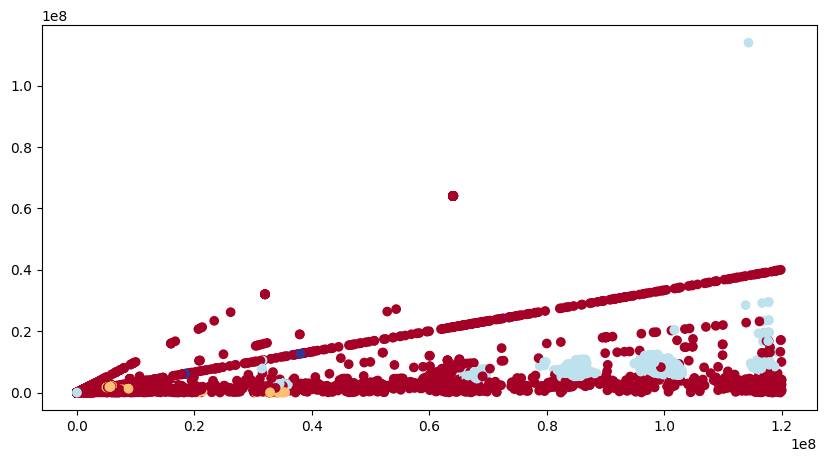

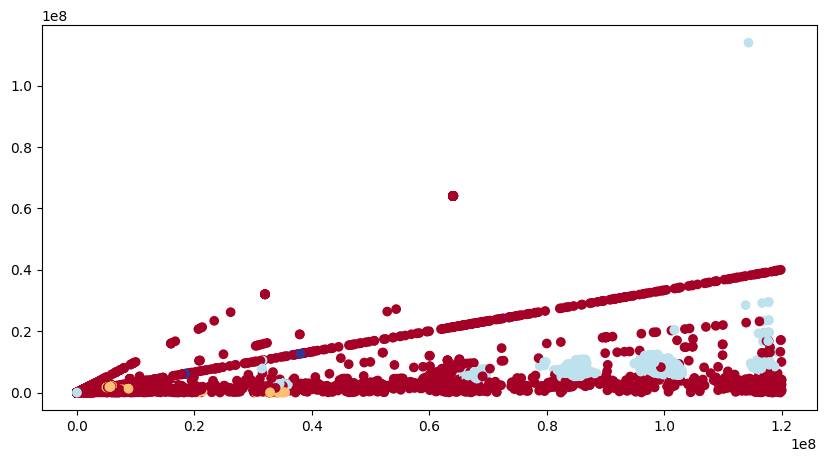

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
plt.scatter(x=data[intestation[0]].values,
            y=data[intestation[1]].values,
            c=data["Label"].values,
            cmap=plt.cm.RdYlBu)
plt.show()
plt.close()

fig, ax = plt.subplots(figsize=(10,5))
plt.scatter(x=data[intestation[0]].values,
            y=data[intestation[1]].values,
            c=data["Label"].values,
            cmap=plt.cm.RdYlBu)

plt.show()
plt.close()

## Dataset Splitting Explanation

This section of the code is responsible for **splitting the dataset** into training, validation, and test sets. Proper dataset splitting ensures that the model is trained effectively, validated for hyperparameter tuning, and tested on unseen data for generalization.

  - **X**: Feature matrix containing Feature_1 and Feature_2, converted into a NumPy array.
  - **y**: y: Target variable (labels), also converted into a NumPy array for classification.
  - **Training Set (X_train, y_train)** → 60% of the dataset, used for model training.
  - **Temporary Set (X_temp, y_temp)** → 40% of the dataset, which will be further split into validation and test sets.
  
The **Temporary Set** is then split in 2 parts to have a **validation** and a **test** set
  - **Validation Set (X_val, y_val)** → 20% of the original dataset (half of X_temp).
  - **Test Set (X_test, y_test)** → 20% of the original dataset.

Final Dataset Split Summary
   - **Training Set** → 60%
   - **Validation Set** → 20%
   - **Test Set** → 20%

In [ ]:
# Split the dataset
X = data.drop('Label', axis=1).values   # 16 feature
y = data['Label'].values                # target

# Split 60% train, 40% temp
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.4, random_state=42, stratify=y
)

# 20% validation 20% training
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

# Verifica le dimensioni
print("Train:", X_train.shape, y_train.shape)
print("Validation:", X_val.shape, y_val.shape)
print("Test:", X_test.shape, y_test.shape)

Train: (17635, 16) (17635,)
Validation: (5879, 16) (5879,)
Test: (5879, 16) (5879,)


## Standardize the Dataset
## **Feature Standardization Explanation**

Feature standardization is an essential preprocessing step in machine learning, especially for models that rely on gradient-based optimization, such as neural networks. Standardizing the features ensures that all input variables have a **mean of 0** and a **standard deviation of 1**, which improves model convergence and prevents certain features from dominating due to scale differences.

  - `StandardScaler`is a class from sklearn.preprocessing that standardizes numerical data. It computes the mean and standard deviation of each feature. So it works well also in presence of outliers
  - The `.fit()` method calculates the mean and standard deviation from the training data.
  - The `.transform()` method applies the transformation
  
**Notice:**
  - The `fit` is done **only** considering the values in the training dataset. `transform` modifies the vadidation/test set.
  - If  **values** present in the **validation/test** set **ARE NOT** present in the **training set**, the `transform` function may fail or needs to handle this missing encoding values.  

In [ ]:
# Standardize the features
X_train[np.isinf(X_train)] = np.nan
X_val[np.isinf(X_val)] = np.nan
X_test[np.isinf(X_test)] = np.nan

# Imputazione dei NaN con la media della feature (fit sul train)
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_val   = imputer.transform(X_val)
X_test  = imputer.transform(X_test)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val   = scaler.transform(X_val)
X_test  = scaler.transform(X_test)

#### Tensors
**Tensors** in PyTorch Tensors are the primary data structure in PyTorch. They are similar to NumPy arrays but have added functionality that supports GPU acceleration and automatic differentiation (*autograd*).

In [ ]:
# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

Note that torch tensors use, by default, float32 (single precision) data type. NumPy, instead, defaults to float64 (double precision).

This happens for performance-related reasons: float32 operations are faster than float64.

**Be carefuls on conversion**

## **V1: A simple neural network**

### **1.1 Building and Understanding the Simple Linear Model**

In this exercise, we implement a simple linear model using PyTorch to understand the foundational concepts of model parameters, including **weights** and **biases**. A univariate linear model is one of the most basic forms of machine learning models and is defined by the equation $y = wx + b$

where:
- $x$ is the input feature,
- $w$ is the weight,
- $b$ is the bias,
- $y$ is the output or prediction.

#### **Model Definition: SimpleLinearModel**

The `SimpleLinearModel` class is a subclass of `nn.Module`, which is the base class for all neural network modules in PyTorch. This class defines a single linear layer using `nn.Linear`, which performs the linear transformation:

`output = input * w + b`

The `SimpleLinearModel` class is structured as follows:

- **`__init__(self, input_size, output_size)`**:
  - This is the constructor method where the linear layer is defined. The `input_size` and `output_size` parameters specify the dimensions of the input and output features, respectively. In this exercise, both the input and output sizes are set to 1, indicating a single feature input and a single prediction output.

- **`forward(self, x)`**:
  - This method defines the forward pass of the model, where the input `x` is passed through the linear layer. The forward pass computes the output by applying the linear transformation described above.

This simple model is trained on a synthetic dataset to learn the relationship between the input features and the target labels. During training, the model iteratively adjusts its weights `w` and bias `b` to minimize the error between the predicted and actual outputs. After training, we can inspect these learned parameters to understand how the model has adapted to the data.

In [ ]:
class SimpleLinearModel_1(nn.Module):
    def __init__(self, input_size, output_size):
        super(SimpleLinearModel_1, self).__init__()
        self.hidden_layer = nn.Linear(in_features = input_size, out_features = 32)
        self.output_layer = nn.Linear(in_features= 32, out_features= output_size)

    def forward(self, x):
      x = self.hidden_layer(x)
      x = self.output_layer(x)

      return x

class SimpleLinearModel_2(nn.Module):
    def __init__(self, input_size, output_size):
        super(SimpleLinearModel_2, self).__init__()
        self.hidden_layer = nn.Linear(in_features = input_size, out_features = 64)
        self.output_layer = nn.Linear(in_features= 64, out_features= output_size)

    def forward(self, x):
      x = self.hidden_layer(x)
      x = self.output_layer(x)

      return x

class SimpleLinearModel_3(nn.Module):
    def __init__(self, input_size, output_size):
        super(SimpleLinearModel_3, self).__init__()
        self.hidden_layer = nn.Linear(in_features = input_size, out_features = 128)
        self.output_layer = nn.Linear(in_features= 128, out_features= output_size)

    def forward(self, x):
      x = self.hidden_layer(x)
      x = self.output_layer(x)

      return x

In [ ]:
# Initialize the model, loss function, and optimizer
n_input_nodes = 16
n_output_nodes = 4
model1 = SimpleLinearModel_1(input_size= n_input_nodes, output_size= n_output_nodes)# Initialize the model, loss function, and optimizer
model2 = SimpleLinearModel_2(input_size= n_input_nodes, output_size= n_output_nodes)# Initialize the model, loss function, and optimizer
model3 = SimpleLinearModel_3(input_size= n_input_nodes, output_size= 4)# Initialize the model, loss function, and optimizer

#### Using `torch.device` for GPU Acceleration

PyTorch provides seamless support for running operations on both CPUs and GPUs using the `torch.device` object. By leveraging the computational power of GPUs, we can significantly speed up the training process of deep learning models, especially when working with large datasets and complex networks.

In this example, we first check if a GPU is available on the machine. In particular, we check if CUDA is available: CUDA is a software layer that provides an interface to the underlying hardware (GPU). If CUDA (and, as a consequence, a GPU) is detected, the tensors are moved to the GPU memory to accelerate computations. Otherwise, the computations fall back to the CPU (i.e., the tensor are kept on the main memory). This flexibility allows the same code to run efficiently on both CPU-only systems and systems equipped with GPUs.

The `torch.device` method is a convenient way to handle this device-agnostic approach, ensuring that tensors and models are placed on the correct device before training or inference.


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device = "cpu"
print(f"The device is set to: {device}")

The device is set to: cpu


So now we can move the model to the currently selected device (either cuda, or cpu).

In [ ]:
model1 = model1.to(device)
model2 = model2.to(device)
model3 = model3.to(device)

---
Note that the model has a `linear` attribute (which we created). This layer has its own attributes: `weight` and `bias`. These are the parameters that the model will learn during training.

The initial values are randomly generated, and the model will adjust them during training to minimize the loss function.

Finally, note that these tensors have the `requires_grad` attribute set to `True`. This attribute is used by PyTorch to determine which tensors should have their gradients computed during the backward pass (i.e., which tensors are learnable parameters). This is used by PyTorch to keep track of the computational graph.

In [ ]:
print("Weight", model1.hidden_layer.weight)
print("Bias", model1.hidden_layer.bias)
print("Weight", model2.hidden_layer.weight)
print("Bias", model2.hidden_layer.bias)
print("Weight", model3.hidden_layer.weight)
print("Bias", model3.hidden_layer.bias)

Weight Parameter containing:
tensor([[ 2.4348e-01, -1.0171e-01,  1.6316e-01, -3.9781e-02,  1.9306e-01,
         -8.0566e-02, -9.6007e-02,  1.5610e-01, -1.2514e-01, -1.4039e-01,
         -7.1363e-02,  5.4342e-03,  2.4814e-01, -8.6259e-02, -8.4831e-02,
         -8.1933e-02],
        [ 1.6759e-02, -6.4760e-02,  8.4620e-02, -5.8861e-03, -7.9025e-02,
         -2.1349e-02, -7.8598e-02, -6.9620e-02, -4.4764e-02, -5.0605e-02,
         -2.2440e-01, -2.3122e-01,  1.6878e-01,  2.4382e-01,  8.5869e-02,
          2.1528e-01],
        [ 4.1451e-02,  1.3180e-02,  2.8600e-02,  5.1689e-03, -1.8489e-01,
         -1.8958e-01,  7.3405e-02,  4.0740e-02, -2.3597e-02,  2.3566e-01,
         -5.5066e-02, -1.2917e-01,  5.1364e-02, -1.5696e-01, -1.0879e-01,
         -1.5136e-01],
        [ 1.2856e-01,  1.9176e-01, -1.0553e-01,  8.2190e-02,  1.0405e-01,
         -2.7709e-02, -1.9412e-01, -1.4570e-01, -6.0677e-02, -2.3485e-01,
         -5.7531e-02,  8.0933e-02, -1.6023e-01, -1.7162e-01, -2.2830e-01,
         -2.04

#### Criterion and Optimizer

In deep learning, two crucial components used during the training process of a model are the **criterion** and the **optimizer**. Understanding these components is essential for effectively training and fine-tuning neural networks.

##### Criterion (Loss Function)

The **criterion**, also known as the **loss function**, is a measure of how well the model's predictions match the actual target values. During training, the loss function evaluates the difference between the predicted outputs and the true labels, quantifying the error of the model. The goal of training is to minimize this error, thereby improving the model's accuracy.

Common loss functions include:

- **Cross Entropy**: Used for multi-class classification problems, like our tasks. We typically use PyTorch's `CrossEntropyLoss`, which takes as input the predicted *logits* (not the probabilities, so unnormalized probabilities that have not been passed through a softmax) is applied) and the ground truths. Alternatively, we could combine `LogSoftmax` and `NLLLoss` (Negative Log Likelihood Loss) together, or applying the softmax ourselves and then using a Negative Log Likelihood function. However, for numerical reasons, we generally prefer using the `CrossEntropyLoss` class directly.
- **Mean Squared Error (MSE)**: Typically used for regression tasks, where the model predicts continuous values.

Here, we use a Cross Entropy loss, since the task involves predicting a label.

##### Optimizer

The **optimizer** is an algorithm or method used to adjust the model's weights to minimize the loss function. It updates the model parameters (weights and biases) based on the gradients computed during backpropagation. The optimizer aims to find the optimal set of parameters that reduce the loss, improving the model’s performance on the training data.

Some common optimizers include:

- **Stochastic Gradient Descent (SGD)**: A basic optimizer that updates the model parameters using a small, randomly selected subset of data (mini-batch) instead of the entire dataset. It’s useful for handling large datasets and reducing computational cost.
- **Adam**: A more advanced optimizer that combines the benefits of two other extensions of SGD, Adaptive Gradient Algorithm (AdaGrad) and Root Mean Square Propagation (RMSProp). It adjusts the learning rate for each parameter dynamically, making it well-suited for complex tasks with sparse gradients.

In this exercise, we use **Adam** as our optimizer.

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer1 = optim.Adam(model1.parameters(), lr=0.0005)
optimizer2 = optim.Adam(model2.parameters(), lr=0.0005)
optimizer3 = optim.Adam(model3.parameters(), lr=0.0005)

### Training Loop

The **training loop** is the core component of the training process in deep learning. It involves repeatedly passing the training data through the model, computing the loss, and updating the model's parameters to minimize the loss. Understanding the training loop is essential for effectively training neural networks and fine-tuning models to achieve high performance.

The training loop typically consists of several key steps that are executed for a number of **epochs** (iterations over the entire dataset). Let's break down the principal functions of the training loop:

1. **Forward Pass**

   During the forward pass, the input data is fed through the neural network to produce predictions. These predictions are compared to the actual labels using the **criterion** (loss function) to compute the loss. This step involves:
   
   - Passing the input data to the model.
   - Computing the model's output (predictions).
   - Calculating the loss by comparing the model’s predictions to the true labels.

2. **Loss Computation**

   The computed loss indicates how well or poorly the model is performing on the training data. The goal is to minimize this loss, so it acts as a guide for the optimizer to adjust the model's weights. The loss function provides a differentiable quantity that the optimizer can use to update the model parameters.

3. **Backward Pass (Backpropagation)**

   The backward pass, also known as **backpropagation**, is where the gradients of the loss with respect to each model parameter are calculated. These gradients indicate how much each parameter contributes to the loss, and they are used to update the model's parameters in the direction that reduces the loss:
   
   - Compute the gradients by performing backpropagation.
   - These gradients are stored for use by the optimizer.

4. **Parameter Update**

   After computing the gradients, the **optimizer** uses them to update the model's parameters (weights and biases). This step adjusts the parameters to minimize the loss function. The optimizer’s update rule determines how the parameters are changed based on the gradients, the learning rate, and potentially other factors (like momentum or weight decays). This involves:
   
   - Using the optimizer to adjust the model's parameters based on the computed gradients.
   - Updating the weights to reduce the loss on the next forward pass.

5. **Zero the Gradients**

   After updating the parameters, the gradients need to be zeroed before the next iteration. This step ensures that gradients from the previous epoch do not accumulate with those from the current epoch, which could lead to incorrect updates:
   
   - Set the gradients to zero using `optimizer.zero_grad()` to prevent accumulation from previous epoch.

6. **Repeat for All Epochs**

   The above steps are repeated for for each epoch until the model converges to an optimal solution or reaches the desired number of epochs. Over multiple epochs, the model learns to generalize better to the training data and, ideally, to new, unseen data.

In summary, the training loop is a repetitive process that allows the model to learn from the data by minimizing the loss through gradient-based optimization. Understanding each function within the loop is crucial for successfully training deep learning models and fine-tuning them for specific tasks.

**Notice:** In this case **NO mini-batching** is performed

In [ ]:
def training_loop_no_minibatch(model, X_train_tensor, y_val_tensor, device, optimizer, criterion):

    # Record the start time
    start_time = time.time()

    # Define training parameters
    num_epochs = 99
    train_losses = []
    val_losses = []

    # Training loop
    for epoch in range(num_epochs):  # Train for epochs
        model.train()  # Set model to training mode
        optimizer.zero_grad()  # Clear previous gradients
        outputs = model(X_train_tensor)  # Forward pass
        loss = criterion(outputs, y_train_tensor)  # Compute loss
        loss.backward()  # Backpropagation
        optimizer.step()  # Update model parameters
        train_losses.append(loss.item())  # Store training loss

        #Validation phase
        model.eval()  # Set model to evaluation mode
        with torch.no_grad():  # Disable gradient computation for validation
            val_outputs = model(X_val_tensor)  # Forward pass
            val_loss = criterion(val_outputs, y_val_tensor)  # Compute validation loss
            val_losses.append(val_loss)  # Store validation loss
        if((epoch+1)%20==0):
            print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {train_losses[-1]:.4f}, Val Loss: {val_losses[-1]:.4f}')


    # Record the end time
    end_time = time.time()
    # Calculate the elapsed time
    elapsed_time = end_time - start_time


    print(f'The function took {elapsed_time:.4f} seconds to execute.')
    # Plot the training and validation loss
    plt.figure(figsize=(10, 5))
    plt.plot(train_losses, label='Train Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.show()

def testing_model_no_minibatch(model,X_tensor,y_tensor , device):
    """
    Evaluate the model on a given tesor and compute accuracy.

    Args:
        model: The trained model.
        X_tensor: tensor with the dataset.
        y_tensor: tensor with the label.
        device: Device to run the model on (CPU or GPU).

    Returns:
        float: Accuracy of the model on the test dataset.
    """
    # Record the start time
    start_time = time.time()


    model.eval()
    with torch.no_grad():
        outputs = model(X_tensor)
        _, predicted = torch.max(outputs, 1)
        accuracy = accuracy_score(y_tensor, predicted)*100

    # Record the end time
    end_time = time.time()
    # Calculate the elapsed time
    elapsed_time = end_time - start_time


    print(f'The function took {elapsed_time:.4f} seconds to execute.')
    return accuracy

Training loop model 1

Epoch 20/99, Train Loss: 1.3660, Val Loss: 1.3620
Epoch 40/99, Train Loss: 1.2524, Val Loss: 1.2491
Epoch 60/99, Train Loss: 1.1589, Val Loss: 1.1557
Epoch 80/99, Train Loss: 1.0789, Val Loss: 1.0754
The function took 3.7328 seconds to execute.


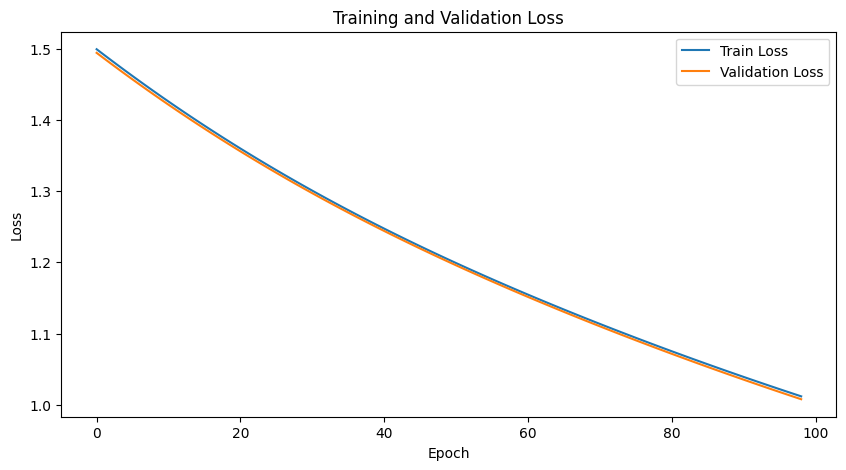

In [ ]:
training_loop_no_minibatch(model1, X_train_tensor, y_val_tensor, device, optimizer1, criterion)

In [ ]:
# Inspecting the learned weights and biases
weights = model1.hidden_layer.weight.data
biases = model1.hidden_layer.bias.data

print(f'Learned weights: {weights}')
print(f'Learned biases: {biases}')

Learned weights: tensor([[ 2.8457e-01, -5.6946e-02,  1.9688e-01,  5.0850e-03,  2.3688e-01,
         -5.2737e-02, -1.4176e-01,  1.8981e-01, -8.4834e-02, -9.5343e-02,
         -2.7535e-02,  4.2019e-02,  2.7578e-01, -1.1966e-01, -5.7186e-02,
         -4.3278e-02],
        [-2.4814e-02, -1.2144e-01,  1.1684e-01, -6.4407e-02, -1.3708e-01,
          3.2007e-03, -9.5217e-02, -3.7402e-02,  6.4322e-04, -1.0800e-01,
         -2.7175e-01, -1.8616e-01,  2.0422e-01,  1.8509e-01,  1.2131e-01,
          2.6108e-01],
        [ 1.0204e-02, -1.8729e-02,  3.8698e-02, -2.7527e-02, -2.1735e-01,
         -1.6869e-01,  9.4726e-02,  5.0839e-02,  7.2540e-03,  2.0279e-01,
         -8.7750e-02, -8.6789e-02,  9.0783e-02, -2.0273e-01, -6.9370e-02,
         -1.2987e-01],
        [ 1.6335e-01,  2.2760e-01, -6.3717e-02,  1.1901e-01,  1.3943e-01,
          3.0845e-03, -2.3887e-01, -1.0390e-01, -1.8438e-02, -2.0022e-01,
         -1.9984e-02,  1.1835e-01, -1.3149e-01, -1.9292e-01, -1.9956e-01,
         -2.3029e-01],
   

In [ ]:
train_accuracy = testing_model_no_minibatch(model1,X_train_tensor,y_train_tensor,device)
val_accuracy = testing_model_no_minibatch(model1,X_val_tensor,y_val_tensor,device)
test_accuracy = testing_model_no_minibatch(model1,X_test_tensor,y_test_tensor,device)

print(f'Train Accuracy: {train_accuracy:.4f}')
print(f'Validation Accuracy: {val_accuracy:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')



The function took 0.0239 seconds to execute.
The function took 0.0058 seconds to execute.
The function took 0.0028 seconds to execute.
Train Accuracy: 66.6232
Validation Accuracy: 66.9332
Test Accuracy: 65.9636


Training loop model 2

Epoch 20/99, Train Loss: 1.3193, Val Loss: 1.3041
Epoch 40/99, Train Loss: 1.1356, Val Loss: 1.1252
Epoch 60/99, Train Loss: 1.0033, Val Loss: 0.9954
Epoch 80/99, Train Loss: 0.9047, Val Loss: 0.8980
The function took 2.5774 seconds to execute.


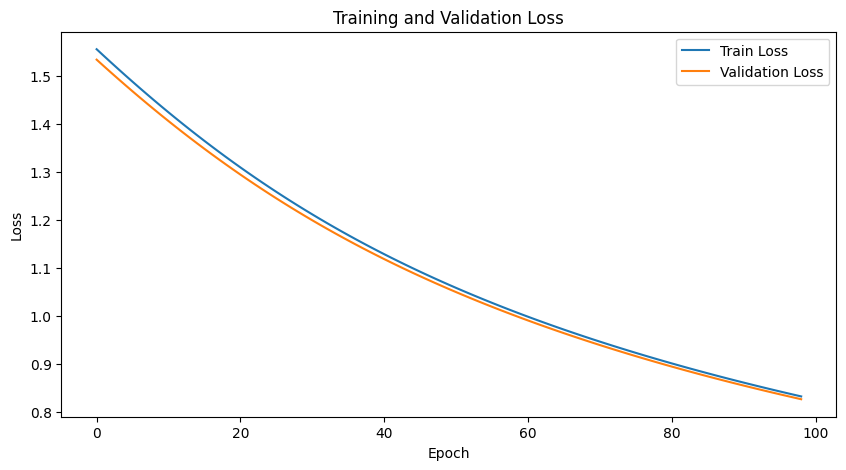

In [ ]:
training_loop_no_minibatch(model2, X_train_tensor, y_val_tensor, device, optimizer2, criterion)

In [ ]:
# Inspecting the learned weights and biases
weights = model2.hidden_layer.weight.data
biases = model2.hidden_layer.bias.data

print(f'Learned weights: {weights}')
print(f'Learned biases: {biases}')

Learned weights: tensor([[-0.1057, -0.0024, -0.2371,  ..., -0.1751,  0.0526,  0.0829],
        [-0.2458,  0.1409, -0.0933,  ...,  0.2234, -0.0573,  0.2455],
        [ 0.2330,  0.0620, -0.0155,  ..., -0.2453, -0.0614, -0.0676],
        ...,
        [ 0.0974,  0.1418, -0.1686,  ...,  0.0626,  0.0324, -0.1065],
        [-0.1212,  0.0483,  0.1301,  ..., -0.1149, -0.1607, -0.1781],
        [-0.1048, -0.0013,  0.1961,  ..., -0.0884,  0.1941, -0.0773]])
Learned biases: tensor([-8.9640e-02, -4.6377e-02,  2.1809e-02, -2.0936e-01,  8.8213e-02,
         4.3786e-02,  1.9940e-01,  7.8075e-02, -1.2929e-01, -2.7894e-01,
         2.7630e-01, -1.3348e-01,  1.8597e-02, -1.6728e-01,  5.6911e-02,
         2.2596e-01, -2.2218e-01, -1.3713e-02,  3.6563e-02, -8.1071e-02,
         2.9513e-02, -1.7616e-01, -1.8345e-01,  9.3668e-02,  3.5225e-02,
        -3.0233e-01,  1.9671e-01,  6.0278e-02,  8.1360e-02, -2.5772e-01,
        -1.5082e-01, -2.0263e-01,  1.7560e-04,  2.7339e-01, -6.4743e-02,
        -2.7742e-01,  

In [ ]:
train_accuracy = testing_model_no_minibatch(model2,X_train_tensor,y_train_tensor,device)
val_accuracy = testing_model_no_minibatch(model2,X_val_tensor,y_val_tensor,device)
test_accuracy = testing_model_no_minibatch(model2,X_test_tensor,y_test_tensor,device)

print(f'Train Accuracy: {train_accuracy:.4f}')
print(f'Validation Accuracy: {val_accuracy:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

The function took 0.0224 seconds to execute.
The function took 0.0162 seconds to execute.
The function took 0.0118 seconds to execute.
Train Accuracy: 72.3107
Validation Accuracy: 72.5293
Test Accuracy: 71.8490


Training loop model 3

Epoch 20/99, Train Loss: 1.1113, Val Loss: 1.0940
Epoch 40/99, Train Loss: 0.9108, Val Loss: 0.8999
Epoch 60/99, Train Loss: 0.7849, Val Loss: 0.7771
Epoch 80/99, Train Loss: 0.7008, Val Loss: 0.6954
The function took 4.3289 seconds to execute.


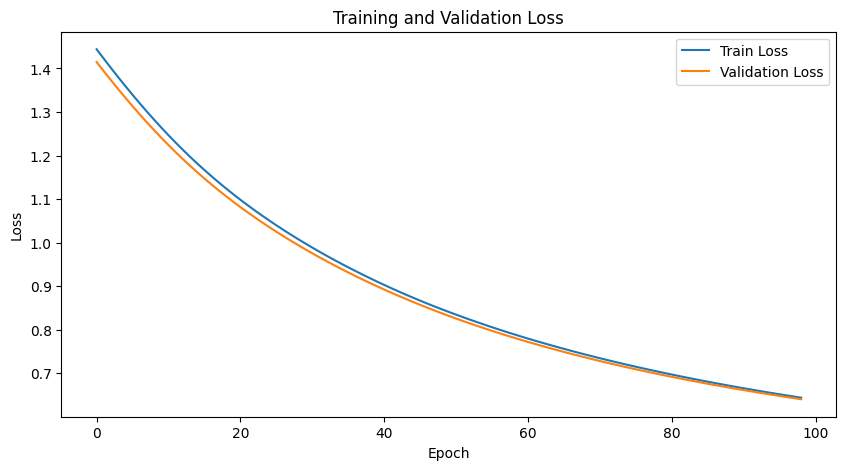

In [ ]:
training_loop_no_minibatch(model3, X_train_tensor, y_val_tensor, device, optimizer3, criterion)

In [ ]:
# Inspecting the learned weights and biases
weights = model3.hidden_layer.weight.data
biases = model3.hidden_layer.bias.data

print(f'Learned weights: {weights}')
print(f'Learned biases: {biases}')

Learned weights: tensor([[-0.1629, -0.0484, -0.0090,  ...,  0.1757, -0.2095, -0.1324],
        [-0.0620, -0.2048,  0.0832,  ...,  0.0555, -0.1813,  0.1304],
        [ 0.1710,  0.2142, -0.1877,  ..., -0.0519,  0.1092,  0.2006],
        ...,
        [-0.1152, -0.1963,  0.1402,  ...,  0.2186, -0.0665,  0.0711],
        [ 0.0744, -0.1437,  0.1334,  ...,  0.1916,  0.1582, -0.2129],
        [-0.0264, -0.1176, -0.1037,  ...,  0.1944, -0.1135, -0.1925]])
Learned biases: tensor([-0.1140,  0.2745,  0.2907, -0.2035,  0.2513, -0.0415, -0.2627, -0.2888,
         0.0769,  0.1658,  0.1298,  0.0040, -0.1077, -0.2456, -0.1650,  0.0339,
         0.0993, -0.1470, -0.0890,  0.2803, -0.3005,  0.0546, -0.0934, -0.1327,
        -0.0370,  0.1100, -0.1825,  0.1630, -0.0466, -0.1292, -0.0645,  0.1729,
         0.1233, -0.1790, -0.0385,  0.0521,  0.2884, -0.0803,  0.0935, -0.0380,
        -0.0744, -0.0978,  0.1959, -0.1344,  0.2755, -0.2000,  0.0944,  0.2351,
         0.0295,  0.2540,  0.0079,  0.1928, -0.2216, 

In [ ]:
train_accuracy = testing_model_no_minibatch(model3,X_train_tensor,y_train_tensor,device)
val_accuracy = testing_model_no_minibatch(model3,X_val_tensor,y_val_tensor,device)
test_accuracy = testing_model_no_minibatch(model3,X_test_tensor,y_test_tensor,device)

print(f'Train Accuracy: {train_accuracy:.4f}')
print(f'Validation Accuracy: {val_accuracy:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

The function took 0.0503 seconds to execute.
The function took 0.0116 seconds to execute.
The function took 0.0115 seconds to execute.
Train Accuracy: 75.5997
Validation Accuracy: 75.4210
Test Accuracy: 75.0468


In [ ]:
from sklearn.metrics import classification_report
import numpy as np
import torch
from sklearn.metrics import f1_score

# Helper to get numpy arrays for validation set (works whether tensors are on CPU or GPU)
def get_val_arrays():
    # X_val_tensor and y_val_tensor are defined in later cells; use them directly
    y_true = y_val_tensor.cpu().numpy() if isinstance(y_val_tensor, torch.Tensor) else np.array(y_val_tensor)
    return y_true

# 1) V1: Val model1
model1.eval()
with torch.no_grad():
    outputs = model1(X_val_tensor)
    preds1 = torch.argmax(outputs, dim=1).cpu().numpy()

y_val_np = get_val_arrays()
print("\nClassification report for Model on validation set:")
print(classification_report(y_val_np, preds1, target_names=label_encoder.classes_))

# 2) Val model2
model2.eval()
with torch.no_grad():
    outputs = model2(X_val_tensor)
    preds2 = torch.argmax(outputs, dim=1).cpu().numpy()

y_val_np = get_val_arrays()
print("\nClassification report for Model on validation set:")
print(classification_report(y_val_np, preds2, target_names=label_encoder.classes_))

# 3)  Val model3
model3.eval()
with torch.no_grad():
    outputs = model3(X_val_tensor)
    preds3 = torch.argmax(outputs, dim=1).cpu().numpy()

y_val_np = get_val_arrays()
print("\nClassification report for Model on validation set:")
print(classification_report(y_val_np, preds3, target_names=label_encoder.classes_))

# Quick summary of performance (automatic, concise)

f1_v1 = f1_score(y_val_np, preds1, average='macro') * 100
f1_v2 = f1_score(y_val_np, preds2, average='macro') * 100
f1_v3 = f1_score(y_val_np, preds3, average='macro') * 100

print(f"\nMacro F1 summary (validation): V1={f1_v1:.2f}%, V2={f1_v2:.2f}%, V3={f1_v3:.2f}%")

# Short interpretation printed programmatically
def interpret(f1):
    if f1 >= 85:
        return "good"
    elif f1 >= 65:
        return "moderate"
    else:
        return "poor"

print("\nInterpretation:")
print(f"V1 {interpret(f1_v1)}")
print(f"V2 {interpret(f1_v2)}")
print(f"V3 {interpret(f1_v3)}")


Classification report for Model on validation set:
              precision    recall  f1-score   support

      Benign       0.71      0.85      0.77      3850
 Brute Force       0.00      0.00      0.00       285
    DoS Hulk       0.55      0.86      0.68       774
    PortScan       0.13      0.01      0.01       970

    accuracy                           0.67      5879
   macro avg       0.35      0.43      0.36      5879
weighted avg       0.56      0.67      0.60      5879


Classification report for Model on validation set:
              precision    recall  f1-score   support

      Benign       0.73      0.93      0.82      3850
 Brute Force       0.00      0.00      0.00       285
    DoS Hulk       0.76      0.86      0.81       774
    PortScan       0.13      0.01      0.02       970

    accuracy                           0.73      5879
   macro avg       0.40      0.45      0.41      5879
weighted avg       0.60      0.73      0.64      5879


Classification report for

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Model V3 seems to be the most accurate of the 3 models

In [ ]:
nneurons=128
class SimpleLinearModel_4(nn.Module):
    def __init__(self, input_size, output_size):
        super(SimpleLinearModel_4, self).__init__()
        self.hidden_layer = nn.Linear(in_features = input_size, out_features = nneurons)
        self.output_layer = nn.Linear(in_features= nneurons, out_features= output_size)
        self.relu = nn.ReLU()

    def forward(self, x):
      x = self.relu(self.hidden_layer(x))
      x = self.output_layer(x)

      return x

In [ ]:

model4 = SimpleLinearModel_4(input_size= n_input_nodes, output_size= n_output_nodes)# Initialize the model, loss function, and optimizer
model4 = model4.to(device)
optimizer4 = optim.Adam(model4.parameters(), lr=0.0005)
training_loop_no_minibatch(model4, X_train_tensor, y_train_tensor, device, optimizer4, criterion)

# Inspecting the learned weights and biases
weights = model4.hidden_layer.weight.data
biases = model4.hidden_layer.bias.data

print(f'Learned weights: {weights}')
print(f'Learned biases: {biases}')

train_accuracy = testing_model_no_minibatch(model4,X_train_tensor,y_train_tensor,device)
val_accuracy = testing_model_no_minibatch(model4,X_val_tensor,y_val_tensor,device)
test_accuracy = testing_model_no_minibatch(model4,X_test_tensor,y_test_tensor,device)

print(f'Train Accuracy: {train_accuracy:.4f}')
print(f'Validation Accuracy: {val_accuracy:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

ValueError: Expected input batch_size (5879) to match target batch_size (17635).

In [ ]:
#Val model4
model4.eval()
with torch.no_grad():
    outputs = model4(X_val_tensor)
    preds4 = torch.argmax(outputs, dim=1).cpu().numpy()

y_val_np = get_val_arrays()
print("\nClassification report for Model on validation set:")
print(classification_report(y_val_np, preds4, target_names=label_encoder.classes_))
f1_v4 = f1_score(y_val_np, preds4, average='macro') * 100
print(f"\nMacro F1 summary (validation): V4={f1_v4:.2f}%")
print("\nInterpretation:")
print(f"V4 {interpret(f1_v4)}")

**TAKEAWAY**: These curve did not reach the convercence longer training may benefit the performance.

## **V2: Introduce non-linearity in the neural network**

  - Include a non linear activation function to introduce non-linearity in the architecture
  - Increment the number of training epochs to serch for converngence

In [ ]:
# Define the neural network
class NonLinearModel(nn.Module):
    def __init__(self, input_size, output_size):
        super(NonLinearModel, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32, output_size)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.fc4(x)
        return x

In [ ]:
# Initialize the model, loss function, and optimizer
model = NonLinearModel(2, 3)
model = model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
training_loop_no_minibatch(model, X_train_tensor, y_val_tensor, device, optimizer, criterion)

In [ ]:
# Inspecting the learned weights and biases
print(f'Learned weights: {model.fc1.weight.data}')
print(f'Learned biases: {model.fc1.bias.data}')
print(f'Learned weights: {model.fc2.weight.data}')
print(f'Learned biases: {model.fc2.bias.data}')
print(f'Learned weights: {model.fc3.weight.data}')
print(f'Learned biases: {model.fc3.bias.data}')
print(f'Learned weights: {model.fc4.weight.data}')
print(f'Learned biases: {model.fc4.bias.data}')

In [ ]:
train_accuracy = testing_model_no_minibatch(model,X_train_tensor,y_train_tensor,device)
val_accuracy = testing_model_no_minibatch(model,X_val_tensor,y_val_tensor,device)
test_accuracy = testing_model_no_minibatch(model,X_test_tensor,y_test_tensor,device)

print(f'Train Accuracy: {train_accuracy:.4f}')
print(f'Validation Accuracy: {val_accuracy:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

## **V3: Add mini-batches in the neural network**
  - mini-batches can improve the model performance and reduce the traning time
  - **NOTICE**: This is a toy example!

In [ ]:
from torch.utils.data import DataLoader, TensorDataset

# Create DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [ ]:
def training_loop_no_minibatch(model, X_train_tensor, y_val_tensor, device, optimizer, criterion):

    # Record the start time
    start_time = time.time()

    # Define training parameters
    num_epochs = 99

    train_losses = []
    val_losses = []

    # Training loop
    for epoch in range(num_epochs):  # Train for epochs
        model.train()  # Set model to training mode
        optimizer.zero_grad()  # Clear previous gradients
        outputs = model(X_train_tensor)  # Forward pass
        loss = criterion(outputs, y_train_tensor)  # Compute loss
        loss.backward()  # Backpropagation
        optimizer.step()  # Update model parameters
        train_losses.append(loss.item())  # Store training loss

        #Validation phase
        model.eval()  # Set model to evaluation mode
        with torch.no_grad():  # Disable gradient computation for validation
            val_outputs = model(X_val_tensor)  # Forward pass
            val_loss = criterion(val_outputs, y_val_tensor)  # Compute validation loss
            val_losses.append(val_loss)  # Store validation loss
        if((epoch+1)%20==0):
            print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {train_losses[-1]:.4f}, Val Loss: {val_losses[-1]:.4f}')


    # Record the end time
    end_time = time.time()
    # Calculate the elapsed time
    elapsed_time = end_time - start_time


    print(f'The function took {elapsed_time:.4f} seconds to execute.')
    # Plot the training and validation loss
    plt.figure(figsize=(10, 5))
    plt.plot(train_losses, label='Train Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.show()

def testing_model_no_minibatch(model,X_tensor,y_tensor , device):
    """
    Evaluate the model on a given tesor and compute accuracy.

    Args:
        model: The trained model.
        X_tensor: tensor with the dataset.
        y_tensor: tensor with the label.
        device: Device to run the model on (CPU or GPU).

    Returns:
        float: Accuracy of the model on the test dataset.
    """
    # Record the start time
    start_time = time.time()


    model.eval()
    with torch.no_grad():
        outputs = model(X_tensor)
        _, predicted = torch.max(outputs, 1)
        accuracy = accuracy_score(y_tensor, predicted)*100

    # Record the end time
    end_time = time.time()
    # Calculate the elapsed time
    elapsed_time = end_time - start_time


    print(f'The function took {elapsed_time:.4f} seconds to execute.')
    return accuracy

In [ ]:
# Initialize the model, loss function, and optimizer
model = NonLinearModel(2, 3)
model = model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
training_loop(model, train_loader, val_loader, train_dataset, val_dataset, device, optimizer, criterion)

In [ ]:
train_accuracy = testing_model(model,train_loader,device)
val_accuracy = testing_model(model,val_loader,device)
test_accuracy = testing_model(model,test_loader,device)

print(f'Train Accuracy: {train_accuracy:.4f}')
print(f'Validation Accuracy: {val_accuracy:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

## **V4: Early stopping in the neural network**
  - Introducing Eerly Stopping
  - **NOTICE**: This is a toy example! So this may be useless!

In [ ]:
# Initialize the model, loss function, and optimizer
model = NonLinearModel(2, 3)
model = model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Initialize the early stopping parameters
min_delta = 0.00001
patience = 20

In [ ]:
training_loop(model, train_loader, val_loader, train_dataset, val_dataset, device, optimizer, criterion,min_delta,patience)

In [ ]:
train_accuracy = testing_model(model,train_loader,device)
val_accuracy = testing_model(model,val_loader,device)
test_accuracy = testing_model(model,test_loader,device)

print(f'Train Accuracy: {train_accuracy:.4f}')
print(f'Validation Accuracy: {val_accuracy:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

## **V6: Normalization in the neural network**
  - Add some normalization tecnquies for improving the performance
  - **NOTICE**: This is a toy example! So this may be useless!

In [ ]:
# Define the neural network with dropout
class NonLinearModelDropOut(nn.Module):
    def __init__(self, input_size, output_size):
        super(NonLinearModelDropOut, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32, output_size)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.relu(self.fc3(x))
        x = self.fc4(x)
        return x

In [ ]:
# Define the neural network with batch normalization
class NonLinearModelNormalization(nn.Module):
    def __init__(self, input_size, output_size):
        super(NonLinearModelNormalization, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        hidden_size = 128 #output of the previous layer
        self.bn1 = nn.BatchNorm1d(hidden_size)  # Batch Normalization Layer
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 32)
        hidden_size = 32 #output of the previous layer
        self.bn3 = nn.BatchNorm1d(hidden_size)  # Batch Normalization Layer
        self.fc4 = nn.Linear(32, output_size)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.bn1(x)
        x = self.dropout(x)
        x = self.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.relu(self.fc3(x))
        x = self.bn3(x)
        x = self.fc4(x)
        return x

In [ ]:
# Initialize the model, loss function, and optimizer
model = NonLinearModelDropOut(2, 3)
model = model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
training_loop(model, train_loader, val_loader, train_dataset, val_dataset, device, optimizer, criterion)

In [ ]:
train_accuracy = testing_model(model,train_loader,device)
val_accuracy = testing_model(model,val_loader,device)
test_accuracy = testing_model(model,test_loader,device)

print(f'Train Accuracy: {train_accuracy:.4f}')
print(f'Validation Accuracy: {val_accuracy:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

### With batch normalization and weigth decay

In [ ]:
# Initialize the model, loss function, and optimizer
model = NonLinearModelNormalization(2, 3)
model = model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=0.02)

In [ ]:
training_loop(model, train_loader, val_loader, train_dataset, val_dataset, device, optimizer, criterion)

In [ ]:
train_accuracy = testing_model(model,train_loader,device)
val_accuracy = testing_model(model,val_loader,device)
test_accuracy = testing_model(model,test_loader,device)

print(f'Train Accuracy: {train_accuracy:.4f}')
print(f'Validation Accuracy: {val_accuracy:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

## **V7: Using GPUs**
  - Change Device

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"The device is set to: {device}")

In [ ]:
# Convert data to PyTorch tensors and send to CUDA
X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train, dtype=torch.long).to(device)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32).to(device)
y_val_tensor = torch.tensor(y_val, dtype=torch.long).to(device)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
y_test_tensor = torch.tensor(y_test, dtype=torch.long).to(device)

In [ ]:
# Create DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [ ]:
# Initialize the model, loss function, and optimizer
model = NonLinearModelNormalization(2, 3)
model = model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=0.02)

In [ ]:
training_loop(model, train_loader, val_loader, train_dataset, val_dataset, device, optimizer, criterion)

In [ ]:
train_accuracy = testing_model(model,train_loader,device)
val_accuracy = testing_model(model,val_loader,device)
test_accuracy = testing_model(model,test_loader,device)

print(f'Train Accuracy: {train_accuracy:.4f}')
print(f'Validation Accuracy: {val_accuracy:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')